In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

logfile = '/home/ubuntu/tmp/log/debug/1/progress.csv'

prog =pd.read_csv(logfile)

prog.head()

,FPS,Q,average_param,entropy,explained_variance,frac,iteration/nupdates,ma_ep_len,ma_ep_ret,mean_step_rew,policy_loss,value_loss,vpreds,vqdiff
0,4375,8.757829,0.001155,0.693144,-0.000660,1.0000,1/10000,13.666667,14.222222,1.0,0.000106,109.57316,0.004368,109.57315
1,10490,9.139627,0.002962,0.693146,-0.003258,0.9991,10/10000,15.853333,16.426667,1.0,-0.000108,121.60480,0.028149,121.60480
2,10506,9.958805,0.005014,0.693144,-0.004166,0.9981,20/10000,18.140000,18.700000,1.0,0.000061,142.30432,0.050554,142.30432
3,10584,8.639934,0.007099,0.693136,-0.010651,0.9971,30/10000,20.340000,20.910000,1.0,-0.000026,107.26920,0.086027,107.26920
4,10479,10.202151,0.009299,0.693128,-0.010787,0.9961,40/10000,20.580000,21.130000,1.0,-0.000152,147.89760,0.108186,147.89758


In [14]:
import torch
import torch.distributions as dist

mean, logstd = torch.rand(4, 1), torch.rand(4, 1)
m = dist.Normal(mean, torch.exp(logstd))

actions = torch.rand(4)

print(actions.shape)
print(m.log_prob(actions))

torch.Size([4])
tensor([[-1.7976, -1.7995, -1.7977, -1.7923],
        [-1.6083, -1.6119, -1.6001, -1.5959],
        [-1.8227, -1.8283, -1.7797, -1.7931],
        [-1.5465, -1.5489, -1.5568, -1.5435]])


In [13]:
softmax = torch.softmax(torch.rand(4, 2), dim=-1)
m = dist.Categorical(softmax)

actions = torch.zeros(4)
m.log_prob(actions)

tensor([-0.7136, -0.7796, -0.7506, -0.8549])

In [20]:
import torch.nn.init as init

help(init.orthogonal_)

Help on function orthogonal_ in module torch.nn.init:

orthogonal_(tensor, gain=1)
    Fills the input `Tensor` with a (semi) orthogonal matrix, as
    described in `Exact solutions to the nonlinear dynamics of learning in deep
    linear neural networks` - Saxe, A. et al. (2013). The input tensor must have
    at least 2 dimensions, and for tensors with more than 2 dimensions the
    trailing dimensions are flattened.
    
    Args:
        tensor: an n-dimensional `torch.Tensor`, where :math:`n \geq 2`
        gain: optional scaling factor
    
    Examples:
        >>> w = torch.empty(3, 5)
        >>> nn.init.orthogonal_(w)



In [31]:
import torch.nn as nn
import math

layer1 = nn.Linear(64, 64)
layer2 = nn.Linear(64, 64)
layer3 = nn.Linear(64, 64)

init.orthogonal_(layer1.weight, gain=math.sqrt(2))
init.orthogonal_(layer2.weight, gain=math.sqrt(0.5))

Parameter containing:
tensor([[-0.0398, -0.0235,  0.0484,  ...,  0.0241, -0.0847, -0.0750],
        [ 0.1135,  0.0896,  0.1236,  ...,  0.1271, -0.0676,  0.1504],
        [-0.0581,  0.1426, -0.1319,  ...,  0.0818, -0.1976,  0.0277],
        ...,
        [-0.0182,  0.0277, -0.0624,  ...,  0.0183, -0.0043, -0.0287],
        [ 0.1094, -0.1087, -0.0748,  ..., -0.0590, -0.0516, -0.0236],
        [ 0.0701, -0.0627, -0.0353,  ..., -0.0868,  0.0704, -0.0706]],
       requires_grad=True)

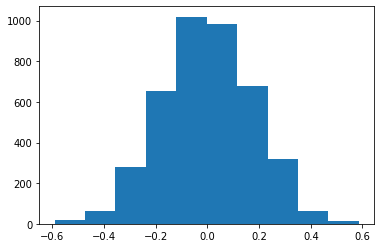

In [32]:
import matplotlib.pyplot as plt

plt.hist(layer1.weight.data.numpy().ravel())
plt.show()

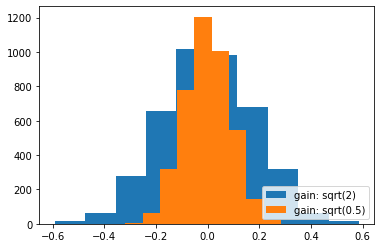

In [35]:
plt.hist(layer1.weight.data.numpy().ravel(), label='gain: sqrt(2)')
plt.hist(layer2.weight.data.numpy().ravel(), label='gain: sqrt(0.5)')
plt.legend(loc='lower right')
plt.show()